<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        K MEANS implementation </h1> </td>
    <strong style="text-align: left; font-size:130%;">
        Project 7 - Scientific Programming course   2021/2022 </strong>
    <td width="25%">
    <div style="text-align: right; font-size:110%">
    <b> Sara Ometto </b><br>
    Matricola 995905 <br>
    Codice persona 10669317 </p><br>
    <a href="mailto:sara.ometto@mail.polimi.it">sara.ometto@mail.polimi.it</a><br>
</tr>
</table>

In [2]:
import csv
import math
import random
from statistics import mean 

### Inputs
- Number of clusters k
- CSV file of points in space

In [ ]:
# k = int(input('Enter the number of clusters: '))

In [ ]:
# inputfile = str(input('Enter the name of the CSV file. Remember: the first line should be the header! '))
# if not ".csv" in inputfile:
    # inputfile += ".csv"

### Exceptions

Define a personalized exception in case the algorithm fails to cluster: it can happen if the groups of points are not well separated.

In [3]:
class ClusterException(Exception):
    "Raised when the algorithm fails"
    pass

### K means algorithm implementation - LISTS

The K means clustering algorithm starts by initializating k centroids chosen randomly from the dataset, then applies iteratively two steps: in the **assignment** the points are assigned to the closest centroid in terms of euclidean distance and the clusters are formed, then the position of the centroids is **updated** as the mean point of each cluster. The algorithm proceeds until convergence, so when the proper clustering solution is reached.

The convergence criteria used in this implementation is the almost-equality of the positions of old centroids and new centroids: the algorithm stops when the last n complete iterations (default is n=5) do not move any of the centroids by a distance bigger than the defined tolerance value.


INPUT: The CSV file is read and each line (which corresponds to a vector in the space) is translated into a list. 
I assumed the file contains a header and that the coordinates are separated by a comma.

In [ ]:
# with open(inputfile, "r") as f:
    # file_reader = csv.reader(f)
    # header = next(file_reader)                                           #skip the first line - header
    # list_points = [[float(val) for val in line] for line in lines]       #create the list of lists
# print(len(list_points))

##### FUNCTIONS

In [4]:
def take_first(vector):
    '''
    Pick the first element of a list.
    Can be used to sort a vector along the first dimension.
    vector: list of coordinates
    '''
    try:
        # check that the vector is not empty
        if len(vector) != 0 and vector[0] is not None:
                return vector[0]  
        else:
            raise ClusterException

    except ClusterException:
        print(f'The algorithm K means lists was not able to form {k} clusters. Try again!')



def euclidean_dist(A, B):
    '''
    Calculate the euclidean distance between two points.
    A and B: lists with points coordinates
    '''
    dist = sum([(A[i]-B[i])**2 for i in range(len(A))])**0.5
    return dist



def centroids_init_list(points, k):
    '''
    Pick randomly k data points as centroids.
    points: list of lists of points coordinates
    k: number of clusters
    '''
    # centroids initialization
    centroids = random.sample(points, k=k)
    return centroids



def assignment(points, centroids, k):
    '''
    Assign each data point to the closest centroid.
    points: list of lists of points coordinates
    centroids: list of k centroids
    k: number of clusters
    '''
    # create the clusters dictionary
    clusters = {i:[] for i in range(k)}
    

    # check that the comparison can be done
    if 0 not in [len(c) for c in centroids]:
        for p in points:
            # compute the distance of the point from each centroid
            distances = [euclidean_dist(p,c) for c in centroids]
            # find the smallest distance
            cluster_label = distances.index(min(distances))
            # assign the point to the closest centroid
            clusters[cluster_label].append(p)  
        
        return clusters



def update_centroids(clusters):
    '''
    Update the position of the k centroids by computing the mean 
    of the points' coordinates in each dimension for every cluster.
    clusters: dictionary with cluster labels as keys and list of points in the cluster as values
    '''
    # retrieve the list of points in each cluster
    # compute the mean of the coordinates in each dimension for every cluster
    new_centroids = [[mean(x) for x in zip(*points)] for label, points in clusters.items()]
    return new_centroids



def check_convergence_list(old_c, new_c, tolerance):
    '''
    Check for convergence of old and new centroids by computing the euclidean distance 
    between each pair and assessing that is at most equal to the tolerance value.
    The two lists of centroids must be sorted before computing the distance.
    old_centroids: list of k centroids from the previous iteration
    new_centroids: list of k centroids from the current iteration
    tolerance: tolerance for convergence
    '''
    
    try:
        # check that the comparison can be done
        if 0 not in [len(c) for c in new_c]:
            # first sort the two lists of centroids according to the first dimension
            old_c = sorted(old_c, key=take_first)
            new_c = sorted(new_c, key=take_first)   
            # compute the distance between each pair of centroids
            # and check that is less or equal to the tolerance
            for i in range(len(old_c)):
                d = euclidean_dist(old_c[i], new_c[i])
                if d > tolerance:
                    return False
            return True   #if all the distances are smaller or equal to the tolerance

        else:
            raise ClusterException

    except ClusterException:
        print(f'The algorithm K means lists was not able to form {k} clusters. Try again!')



def k_means_list(points, k, tolerance=1e-5, n=5):
    '''
    K means algorithm implementation for a list of lists.
    points: list of lists correspoding to points in the space
    k: number of clusters
    tolerance: tolerance for convergence, default tolerance=1e-5
    n: after which number of iterations with similar cluster partitioning the algorithm stops, default n=5
    '''
    
    # check that the number of clusters is less than the points                  #INPUT CHECK
    if k > len(points):
        raise ValueError("The number of clusters must be smaller that the number of data points!")
    
    # initialization of the centroids
    centroids = centroids_init_list(points,k)                                    #INITIALIZATION
    
    # initialize the iterations variable to count how many times the cluster partitioning is similar
    iterations = 0
    
    while iterations < n:
        
        # assign each point to the closest centroid
        clusters = assignment(points, centroids, k)                              #ASSIGNMENT
        if clusters is None:
            break
        
        # update the centroid location
        new_centroids = update_centroids(clusters)                               #UPDATE
        if new_centroids is None:
            break
        
        if check_convergence_list(centroids, new_centroids, tolerance):          #CONVERGENCE
            iterations +=1
            
        else: iterations = 0
        
        # update the centroids variable
        centroids = new_centroids
    
    # exit from the function if the algorithm failed to find the clusters
    if clusters is None:
        return
    
    # prepare the output: add the cluster label as the last element of each list of coordinates
    else:
        output = []
        for label, points in clusters.items():
            for p in points:
                x=p.copy()
                x.append(label)
                output.append(x)

        # in this way the list of lists can be converted in dataframe for better visual representation
        return output, centroids

### K means algorithm implementation - NUMPY VECTORS

The implementation with vectors follows the same steps described before, with the same convergence criteria. In this case however the tolerance values (relative and absolute) are already defined in the `np.allclose` function used to check for convergence.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

The CSV file is read and each line (which corresponds to a vector in the space) is translated into an array. I assumed the file contains a header.

In [ ]:
# array_points = np.genfromtxt(inputfile, delimiter=',', dtype=float, skip_header=1)
# print(len(array_points))

###### FUNCTIONS

In [6]:
def centroids_init_array(points, k):
    '''
    Pick randomly k data points as centroids.
    array_points: np array of multidimensional vectors
    k: number of clusters
    '''
    # centroids initialization
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]
    return centroids



def check_convergence_array(old_c, new_c):
    '''
    Check for convergence of old and new centroids by using the numpy.allclose function.
    The function returns True if two arrays are element-wise equal within a tolerance.
    Default tolerances: rtol=1e-05 (relative), atol=1e-08 (absolute).
    The two arrays of centroids must be sorted before computing the distance.
    old_c: array of k centroids from the previous iteration
    new_c: array of k centroids from the current iteration
    '''
    try:
        # check that the comparison can be done:
        if old_c.shape[0] == new_c.shape[0]:
            # obtain the indices of the sorted vectors along the first axis (axis=0)
            sorted_idx_old = np.argsort(old_c[:, 0])
            sorted_idx_new = np.argsort(new_c[:, 0])
            # use them to index into the array and get the sorted points
            old_c = old_c[sorted_idx_old]
            new_c = new_c[sorted_idx_new]

            # check if the old and new centroids are equal within the tolerance
            return np.allclose(new_c, old_c)

        else:
            raise ClusterException

    except ClusterException:
        print(f'The algorithm K means array was not able to form {k} clusters. Try again!')



def k_means_array(points, k, n=5):
    '''
    K means algorithm implementation for a numpy array.
    array_points: 2D np array of vectors correspoding to points in the space
    k: number of clusters
    tolerance: tolerance for convergence, default tolerance=1e-5
    n: after which number of iterations with similar cluster partitioning the algorithm stops, default n=5
    '''
    
    # check that the number of clusters is less than the points                   #INPUT CHECK
    if k > points.shape[0]:
        raise ValueError("The number of clusters must be smaller that the number of data points!")
    
    # initialization of the centroids
    centroids = centroids_init_array(points,k)                                    #INITIALIZATION
    
    # create a data frame with the vectors of coordinates
    df = pd.DataFrame(points)
    
    # initialize the iterations variable to count how many times the cluster partitioning is similar
    iterations = 0
 
    while iterations < n:
                                                                                  #ASSIGNMENT
        # compute distances between the point matrix and each centroid
        distances = np.array([np.linalg.norm(points-c, axis=1) for c in centroids])
        # assign each data point to the closest centroid
        cluster_labels = np.argmin(distances, axis=0)
        
        if cluster_labels is None:
            break
        
        # add a column to the data frame with the cluster label
        df['cluster'] = cluster_labels
        
                                                                                  #UPDATE
        # recompute the centroids as the mean point in each cluster
        new_centroids = np.array(df.groupby('cluster').agg('mean'))
        if new_centroids is None:
            break

                                                                                  #CONVERGENCE
        if check_convergence_array(centroids, new_centroids):
            iterations +=1
            
        else: iterations = 0
            
       
        # update the centroids variable
        centroids = new_centroids
        
    return df.sort_values(by=['cluster']), centroids

### TESTS

To test the two implementations, showcase their differences and how their perfomance changes depending on different parameters I chose a dataset of **mice protein expression**, used for a clustering project in the Machine Learning course. 

The dataset has 1080 instances and 82 attributes, 77 of which are numeric and represent protein expression levels.

In [7]:
# upload of the file used for testing
# the original file can be downloaded from:
# https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

filename = 'cortex.csv'
data = pd.read_csv(filename).fillna(0)

# select the columns with numeric values
object_cols = [x for x in data if data.dtypes[x] == 'object']
data = data.drop(columns = object_cols)
data.shape

(1080, 77)

In [8]:
# create the array and the list of lists for the two K means implementations
data_array = data.to_numpy()
data_list = data_array.tolist()

# dimensions check
print("Dimensions of the list of lists: ", (len(data_list), len(data_list[0])))
print("Dimensions of the array: ", data_array.shape)

Dimensions of the list of lists:  (1080, 77)
Dimensions of the array:  (1080, 77)


#### Visual representation

To visually represent a clustering with more than 2 attributes, the data needs to be projected on the two principal components usign PCA. The method is contained in `sklearn.decomposition` library.

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time     #for the execution time evaluation (see below)

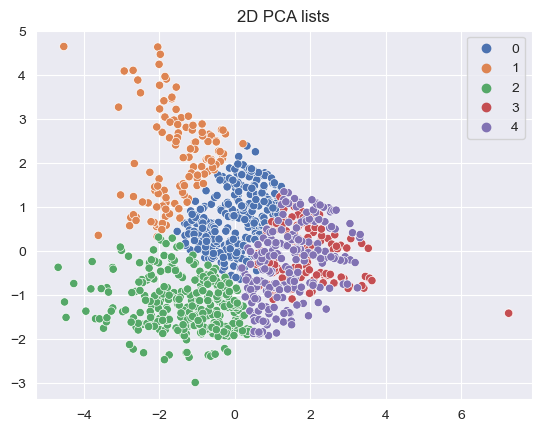

In [13]:
# K MEANS LISTS

# run the algorithm and save the output
clusters_list, centroids_list = k_means_list(data_list, k=5)

# initialize PCA with 2 principal components
pca = PCA(n_components=2)

# prepare the data
XL = [x[:-1] for x in clusters_list]
YL = [x[-1] for x in clusters_list]

# fit and transform the data
X_pcaL = pca.fit_transform(XL)

# plot the data points
sns.set_style('darkgrid')
sns.scatterplot(data=X_pcaL, x=X_pcaL[:, 0], y=X_pcaL[:, 1], 
                        hue=YL, palette='deep').set(title="2D PCA lists")
plt.show()

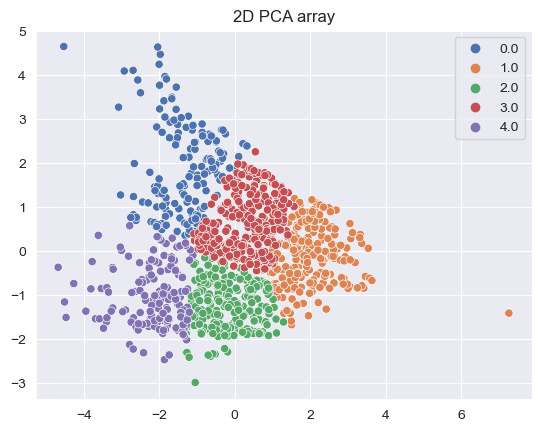

In [11]:
# K MEANS ARRAY

# run the algorithm and save the output
df_array, centroids_array = k_means_array(data_array, k=5)
clusters_array = np.array(df_array)

# initialize PCA with 2 principal components
pca = PCA(n_components=2)

# prepare the data
XA = clusters_array[:, :-1]
YA = clusters_array[:, -1]

# fit and transform the data
X_pcaA = pca.fit_transform(XA)

# plot the data points
sns.set_style('darkgrid')
sns.scatterplot(data=X_pcaA, x=X_pcaA[:, 0], y=X_pcaA[:, 1], 
                        hue=YA, palette='deep').set(title="2D PCA array")
plt.show()

#### Performance changes
The purpose of the following code is to evalutate how the performances of the two algorithms change in terms of execution time depending on vector size, number of vectors and number of clusters. First I consider the three parameters separately (one changes while the other two remain fixed) and I compute the mean execution time over 5 iterations with the `time` package.


##### VECTOR SIZE

In [14]:
# clusters = 10, samples = 500
k=10
s=500

# set the number of rows to work with
dataset = data_list[:s]

# create a list of vector sizes
size = [n for n in range(10, (data_array.shape[1]), 5)]

# initialize the lists of execution times
vsize_timesL = []
vsize_timesA = []


for n in size:
    # cut the size of the vectors
    cut_list = [x[:n] for x in dataset]
    cut_array = np.array(cut_list)
            
    # initialize the times list
    secondsL = []
    secondsA = []

    # compute the execution times 5 times and get the mean time
    for i in range(5):
        start = time.time()
        k_means_list(cut_list, k=k)
        end = time.time()
        secondsL.append(end-start)

        start = time.time()
        k_means_array(cut_array,k=k)
        end = time.time()
        secondsA.append(end-start)

    # compute the average time and append it to the execution times list
    vsize_timesL.append(np.mean(secondsL))
    vsize_timesA.append(np.mean(secondsA))

##### NUMBER OF VECTORS

In [15]:
# clusters = 10, vector size = 77 (all the attributes)
k=10

# create a list of sample sizes (number of vectors):
samples = [n for n in range(100, (data_array.shape[0]), 100)]

# initialize the lists of execution times
vnumber_timesL = []
vnumber_timesA = []


for s in samples:
    # cut the size of the vectors
    cut_list = data_list[:s]
    cut_array = np.array(cut_list)
            
    # initialize the times list
    secondsL = []
    secondsA = []

    # compute the execution times 5 times and get the mean time
    for i in range(5):
        start = time.time()
        k_means_list(cut_list, k=k)
        end = time.time()
        secondsL.append(end-start)

        start = time.time()
        k_means_array(cut_array,k=k)
        end = time.time()
        secondsA.append(end-start)

    # compute the average time and append it to the execution times list
    vnumber_timesL.append(np.mean(secondsL))
    vnumber_timesA.append(np.mean(secondsA))

##### NUMBER OF CLUSTERS

In [16]:
# samples = 500, vector size = 77 (all the attributes)

# use the 'dataset' defined before with 500 rows

# create a list of clusters:
Ks = [k for k in range(2,16)]

# initialize the lists of execution times
k_timesL = []
k_timesA = []


for k in Ks:
    # cut the size of the vectors
    cut_list = dataset
    cut_array = np.array(cut_list)
            
    # initialize the times list
    secondsL = []
    secondsA = []

    # compute the execution times 5 times and get the mean time
    for i in range(5):
        start = time.time()
        k_means_list(cut_list, k=k)
        end = time.time()
        secondsL.append(end-start)

        start = time.time()
        k_means_array(cut_array,k=k)
        end = time.time()
        secondsA.append(end-start)

    # compute the average time and append it to the execution times list
    k_timesL.append(np.mean(secondsL))
    k_timesA.append(np.mean(secondsA))

#### Execution times plot

After creating the dataframes, I plot the execution times changes and distributions between the two implementations according to different values of the parameters.

In [17]:
# create the dataframes for the barplot
vsize={'vec size': size*2, 'time': vsize_timesL + vsize_timesA, 
   'implementation': ['Lists']*len(size) + ['Array']*len(size)}
vsize_bar = pd.DataFrame(vsize)

vnum={'vec number': samples*2, 'time': vnumber_timesL + vnumber_timesA, 
   'implementation': ['Lists']*len(samples) + ['Array']*len(samples)}
vnumber_bar=pd.DataFrame(vnum)

knum={'k number': Ks*2, 'time': k_timesL + k_timesA, 
   'implementation': ['Lists']*len(Ks) + ['Array']*len(Ks)}
knumber_bar=pd.DataFrame(knum)

# merge them in one dataframe
df_violin = pd.DataFrame()
df_violin['param'] = (['vector size']*vsize_bar.shape[0] + ['vector number']*vnumber_bar.shape[0] 
                      + ['k number']*knumber_bar.shape[0])
df_violin['time'] = list(vsize_bar['time']) + list(vnumber_bar['time']) + list(knumber_bar['time'])
df_violin['implementation'] = (list(vsize_bar['implementation']) + list(vnumber_bar['implementation']) 
                               + list(knumber_bar['implementation']))

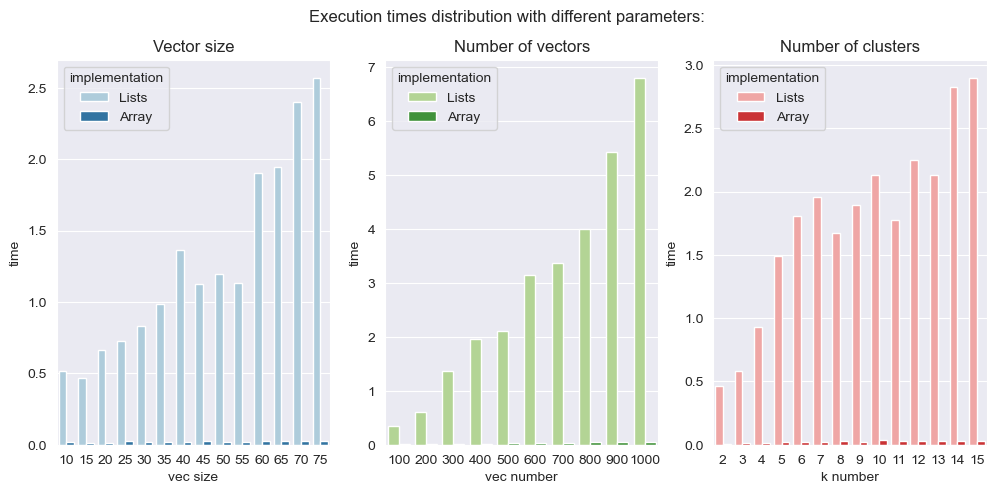

In [18]:
# plot the time performance

sns.set_style('darkgrid')
sns.set_palette("Paired")
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,5))
fig.suptitle('Execution times with different parameters:')

# vector size
sns.barplot(ax=axes[0], data=vsize_bar, x='vec size', y='time', hue='implementation', 
            palette= sns.color_palette("Paired")[:2])
axes[0].set_title('Vector size')

# vector number
sns.barplot(ax=axes[1], data=vnumber_bar, x='vec number', y='time', hue='implementation',
            palette= sns.color_palette("Paired")[2:4])
axes[1].set_title('Number of vectors')

# cluster number
sns.barplot(ax=axes[2], data=knumber_bar, x='k number', y='time', hue='implementation',
            palette= sns.color_palette("Paired")[4:6])
axes[2].set_title('Number of clusters')

plt.show()

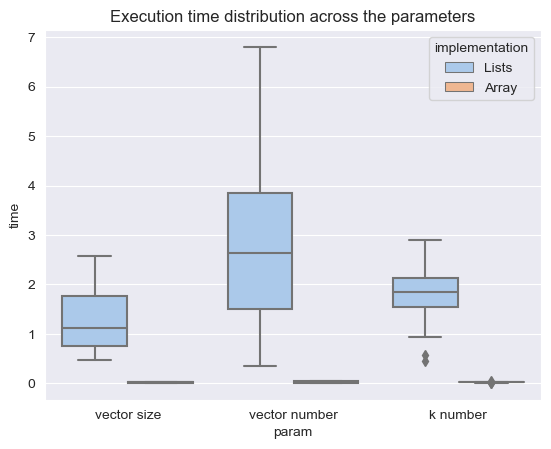

In [19]:
# plot the times distribution
sns.boxplot(data=df_violin, x='param', y='time', hue='implementation', 
               palette="pastel").set(title='Execution time distribution across the parameters')
plt.show()

#### Summary plot

Now I consider all the parameters together (vector size, number of vectors and number of clusters) to show how the execution time changes. In the summary plot the clusters increase over the columns and the samples over the rows. Each plot shows the execution times distribution with the increase of dimensions in the points (vector size).

In [20]:
# create a data frame of the times
df_times = pd.DataFrame(columns = ['Vector size', 'Samples', 'Clusters', 
                                   'K Means Lists', 'K Means Array'])

In [21]:
# loop over different number of clusters, of samples and vector size 
# to show how the performance changes depending on all three parameters

# clusters:
Ks = [2, 4, 6, 8, 10]

# samples:
samples = [100, 200, 300, 400, 500]

# vector size: 
size = [n for n in range(10, (data_array.shape[1]), 10)]


for k in Ks:
    
    for s in samples:
        
        # set the number of vectors to work with
        data = data_list[:s]
        
        for n in size:
        
            # cut the size of the vectors
            cut_list = [x[:n] for x in data]
            cut_array = np.array(cut_list)
            
            # initialize the times list
            timesL = []
            timesA = []

            # compute the execution times 5 times and get the mean time
            for i in range(5):
                start = time.time()
                k_means_list(cut_list, k=k)
                end = time.time()
                timesL.append(end-start)

                start = time.time()
                k_means_array(cut_array,k=k)
                end = time.time()
                timesA.append(end-start)

            tL = np.mean(timesL)
            tA = np.mean(timesA)
            
            newrow = pd.Series({'Vector size': n, 'Samples': s, 'Clusters': k, 
                                'K Means Lists': tL, 'K Means Array': tA})
            
            df_times = pd.concat([df_times, newrow.to_frame().T], ignore_index=True)

In [22]:
# transform the dataframe in long format to use it for the plots
long_df = pd.melt(df_times, id_vars=['Vector size', 'Samples', 'Clusters'], var_name='Implementation', 
                  value_vars=['K Means Lists', 'K Means Array'], value_name='Execution time (seconds)')

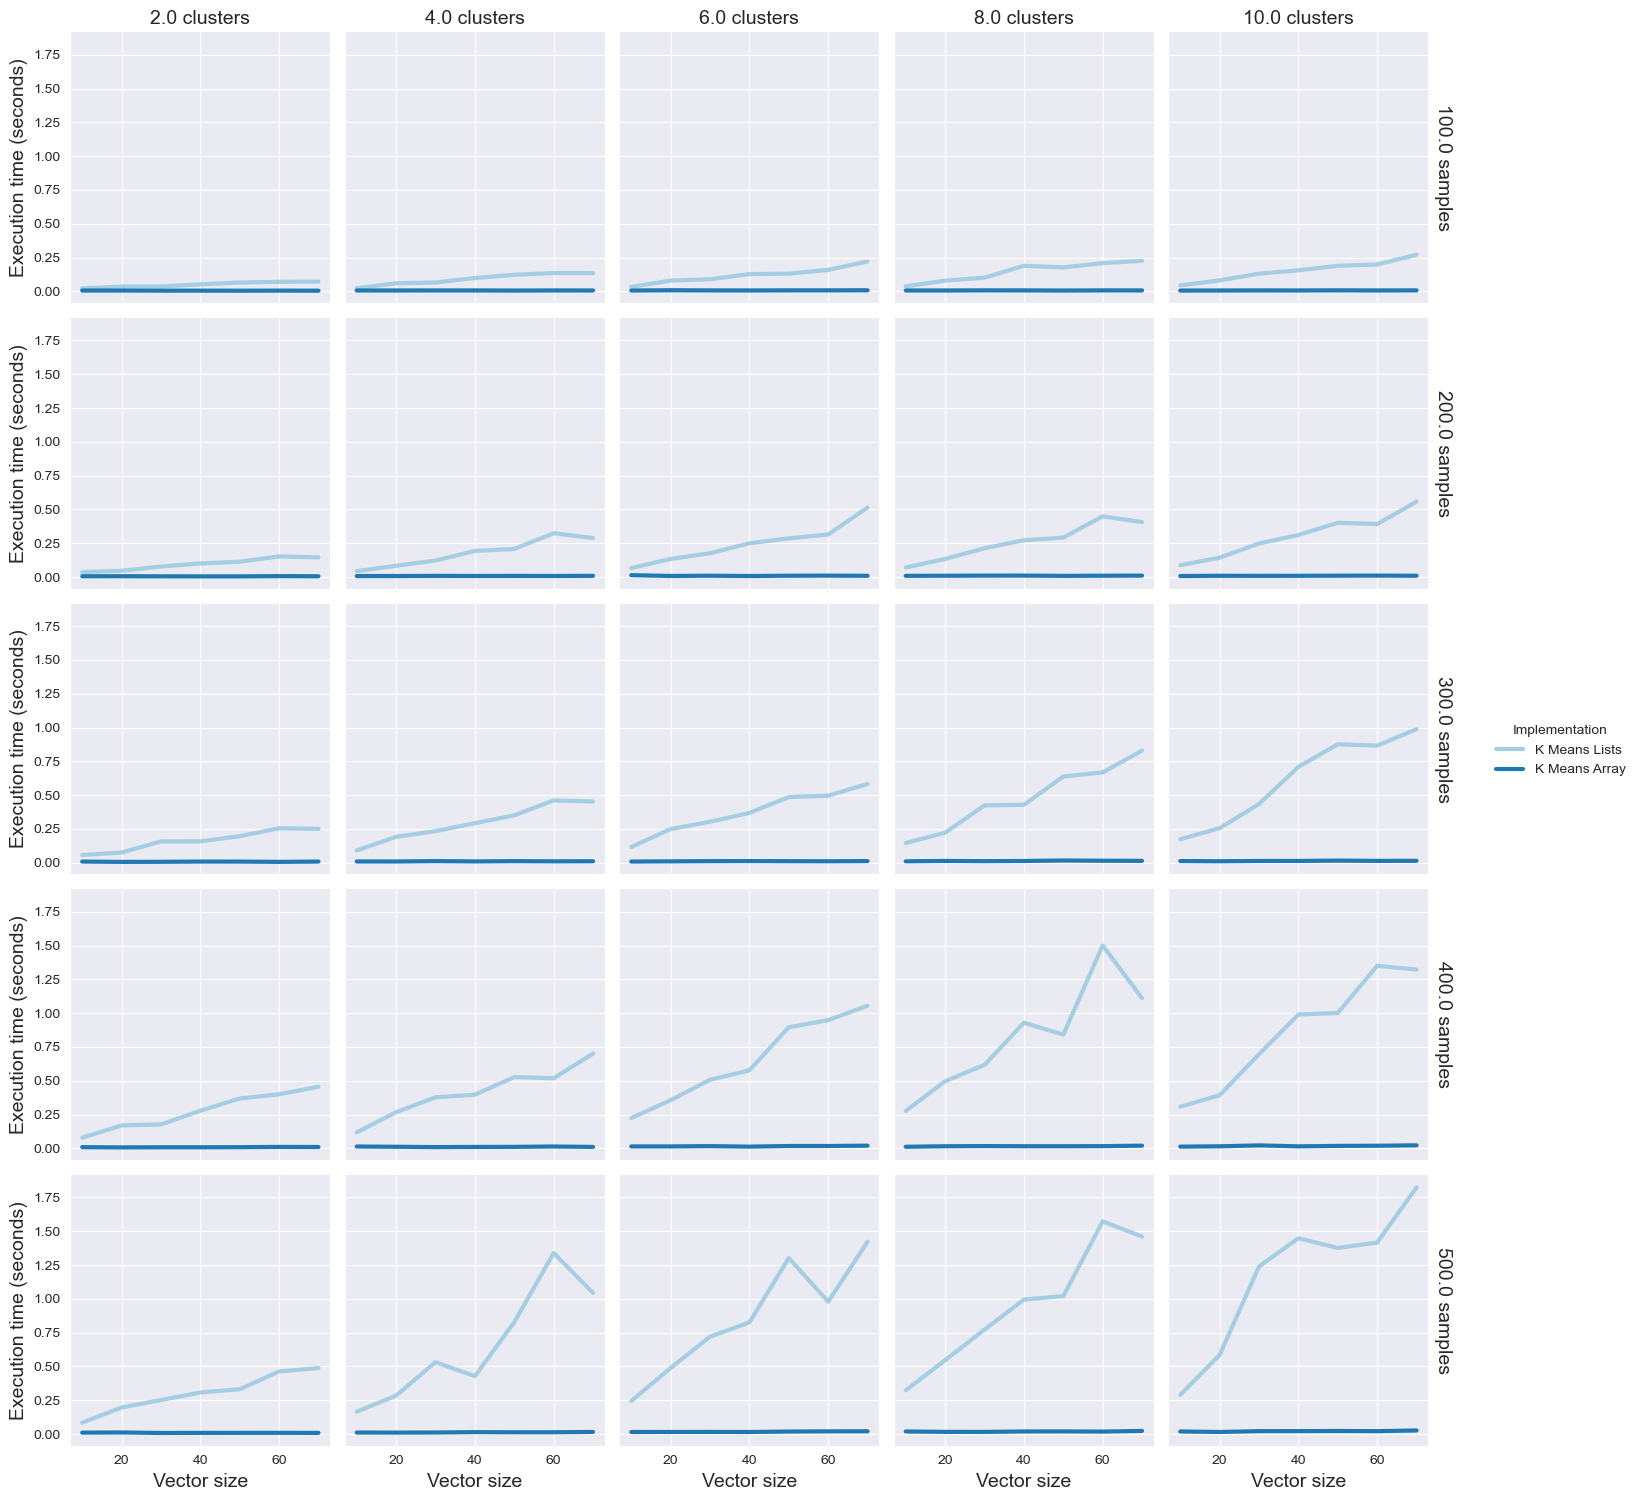

In [23]:
g = sns.FacetGrid(long_df, col="Clusters", row="Samples", hue="Implementation", 
                  margin_titles=True)
g.map_dataframe(sns.lineplot, x="Vector size", y="Execution time (seconds)", linewidth=3)
g.add_legend(fontsize=10)
g.set_xlabels(fontsize=14)
g.set_ylabels(fontsize=14)
g.set_titles(col_template="{col_name} clusters", row_template="{row_name} samples", size=14)

plt.show()

Overall it is crystal clear that the K means implementation for lists has a higher execution time and that it increases way rapidly with the increase of all the parameters. On the other hand, the execution time of K means implementation for numpy array is more or less constant in all the cases and it remains under 0.2 seconds even with a lot of clusters, samples and dimensions.